In [5]:
## Load the libraries you are going to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## read the csv file downloaded from Wood
csv_path = 'Argentina Well Data Science Challenge_M.csv'
## The function below returns a Pandas DataFrame
## fb_well_data = pd.read_csv(csv_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
fb_well_data = pd.read_csv(csv_path, encoding='latin-1')
# show the table header
fb_well_data.head()

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,Completion_Date,Reservoir,play_name,state_name,well_cost
0,8.799000e+13,UN,x-1001,Calmuco (CAL),Provincia Mendoza,-36.530880,-69.765530,4097.0,NaN,NaN,NaN,Unassigned,Unassigned,Mendoza,4.435899e+05
1,8.799000e+13,UN,x-1003,Calmuco (CAL),Provincia Mendoza,-36.536380,-69.768330,2618.0,NaN,NaN,NaN,Unassigned,Unassigned,Mendoza,2.592238e+05
2,8.799000e+13,UN,CHOx-1,Chanares Herrados (CHA),Chanares Herrados,-33.365903,-69.016933,15675.0,NaN,NaN,NaN,Unassigned,Unassigned,Mendoza,2.178866e+06
3,8.799000e+13,UN,CDJx-2,Cerro Dona Juana (CDJ),Geopark Argentina,-35.820042,-69.781180,11118.0,NaN,NaN,NaN,Agrio,Unassigned,Mendoza,1.269930e+06
4,8.799000e+13,UN,CHEx-1,Chanares Herrados (CHA),Chanares Herrados,-33.359458,-68.947347,12007.0,NaN,NaN,NaN,Unassigned,Unassigned,Mendoza,1.651346e+06


In [ ]:
## Assign a st_dt and end_dt for unconventinal
fb_well_data['Drilling_Start'] = fb_well_data['Drilling_Start'].fillna('1/01/1970')
fb_well_data['Drilling_end'] = fb_well_data['Drilling_end'].fillna('3/01/1970')
fb_well_data['Completion_Date'] = fb_well_data['Completion_Date'].fillna('4/01/1970')
## Store in datetime format
fb_well_data['Drilling_Start'] = pd.to_datetime(fb_well_data['Drilling_Start'])
fb_well_data['Drilling_end'] = pd.to_datetime(fb_well_data['Drilling_end'])
fb_well_data['Completion_Date'] = pd.to_datetime(fb_well_data['Completion_Date'])
## Assign average Measured_Depth if missing
fb_well_data['Measured_Depth'] = fb_well_data['Measured_Depth'].fillna(5690)
## This example uses a moving average to fill null or missing values in the data set
##fb_ticker_data['NOCP'] = fb_ticker_data['NOCP'].fillna(fb_ticker_data['NOCP'].rolling(window = 2).mean())
## forward fill, backward fill
## fb_ticker_data['NOCP'] = fb_ticker_data['NOCP'].fillna(method='ffill')
## fb_ticker_data['NOCP'] = fb_ticker_data['NOCP'].fillna(method='bfill')
fb_well_data.head()

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,Completion_Date,Reservoir,play_name,state_name,well_cost
0,8.799000e+13,UN,x-1001,Calmuco (CAL),Provincia Mendoza,-36.530880,-69.765530,4097.0,1970-01-01,1970-03-01,1970-04-01,Unassigned,Unassigned,Mendoza,4.435899e+05
1,8.799000e+13,UN,x-1003,Calmuco (CAL),Provincia Mendoza,-36.536380,-69.768330,2618.0,1970-01-01,1970-03-01,1970-04-01,Unassigned,Unassigned,Mendoza,2.592238e+05
2,8.799000e+13,UN,CHOx-1,Chanares Herrados (CHA),Chanares Herrados,-33.365903,-69.016933,15675.0,1970-01-01,1970-03-01,1970-04-01,Unassigned,Unassigned,Mendoza,2.178866e+06
3,8.799000e+13,UN,CDJx-2,Cerro Dona Juana (CDJ),Geopark Argentina,-35.820042,-69.781180,11118.0,1970-01-01,1970-03-01,1970-04-01,Agrio,Unassigned,Mendoza,1.269930e+06
4,8.799000e+13,UN,CHEx-1,Chanares Herrados (CHA),Chanares Herrados,-33.359458,-68.947347,12007.0,1970-01-01,1970-03-01,1970-04-01,Unassigned,Unassigned,Mendoza,1.651346e+06


In [ ]:
## Calculate the penetration rate ~ V ~ depth / day
## fb_well_data.dtypes
fb_well_data['Drilling_Time'] = (fb_well_data['Drilling_end'] - fb_well_data['Drilling_Start']).dt.days
fb_well_data['Completion_Time'] = (fb_well_data['Completion_Date'] - fb_well_data['Drilling_end']).dt.days
fb_well_data['DrillandComp_Time'] = (fb_well_data['Completion_Date'] - fb_well_data['Drilling_Start']).dt.days
fb_well_data['Time_Fraction_Drilling'] = fb_well_data['Drilling_Time'] / fb_well_data['DrillandComp_Time']
fb_well_data['Time_Fraction_Completion'] = fb_well_data['Completion_Time'] / fb_well_data['DrillandComp_Time']
fb_well_data['Penetration_Rate'] = (fb_well_data['Measured_Depth'])/(fb_well_data['Drilling_Time'])
fb_well_data['Cost_per_Meter'] = fb_well_data['well_cost']/fb_well_data['Measured_Depth']
fb_well_data['Avg_Daily_Cost'] = fb_well_data['Penetration_Rate'] * fb_well_data['Cost_per_Meter']

## I want the series in order
## Sort by Trade DATE
##fb_ticker_data = fb_ticker_data.sort_values(by=['Trade DATE'], ascending = True)
fb_well_data.head()

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,...,state_name,well_cost,Drilling_Time,Completion_Time,DrillandComp_Time,Time_Fraction_Drilling,Time_Fraction_Completion,Penetration_Rate,Cost_per_Meter,Avg_Daily_Cost
0,8.799000e+13,UN,x-1001,Calmuco (CAL),Provincia Mendoza,-36.530880,-69.765530,4097.0,1970-01-01,1970-03-01,...,Mendoza,4.435899e+05,59,31,90,0.655556,0.344444,69.440678,108.271876,7518.472490
1,8.799000e+13,UN,x-1003,Calmuco (CAL),Provincia Mendoza,-36.536380,-69.768330,2618.0,1970-01-01,1970-03-01,...,Mendoza,2.592238e+05,59,31,90,0.655556,0.344444,44.372881,99.015972,4393.623986
2,8.799000e+13,UN,CHOx-1,Chanares Herrados (CHA),Chanares Herrados,-33.365903,-69.016933,15675.0,1970-01-01,1970-03-01,...,Mendoza,2.178866e+06,59,31,90,0.655556,0.344444,265.677966,139.002608,36929.930051
3,8.799000e+13,UN,CDJx-2,Cerro Dona Juana (CDJ),Geopark Argentina,-35.820042,-69.781180,11118.0,1970-01-01,1970-03-01,...,Mendoza,1.269930e+06,59,31,90,0.655556,0.344444,188.440678,114.222913,21524.243136
4,8.799000e+13,UN,CHEx-1,Chanares Herrados (CHA),Chanares Herrados,-33.359458,-68.947347,12007.0,1970-01-01,1970-03-01,...,Mendoza,1.651346e+06,59,31,90,0.655556,0.344444,203.508475,137.531977,27988.922881


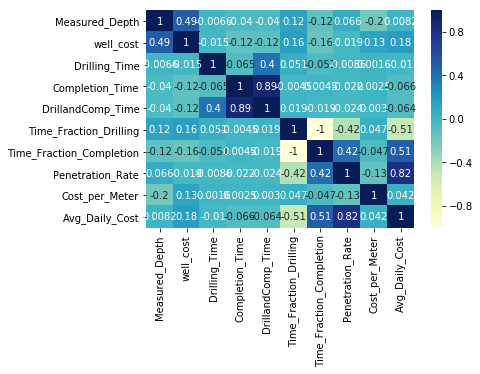

In [ ]:
## Correlogram Measured_Depth vs well cost vs ...
features_to_use = ['Well type code','Operator','Measured_Depth','well_cost'
                  ,'Drilling_Time','Completion_Time','DrillandComp_Time','Time_Fraction_Drilling'
                   ,'Time_Fraction_Completion','Penetration_Rate','Cost_per_Meter'
                    ,'Avg_Daily_Cost']
features = fb_well_data[features_to_use]
# quick correlation heatmap
# plot the heatmap and annotation on it
corr = features.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, cmap="YlGnBu")
##features.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


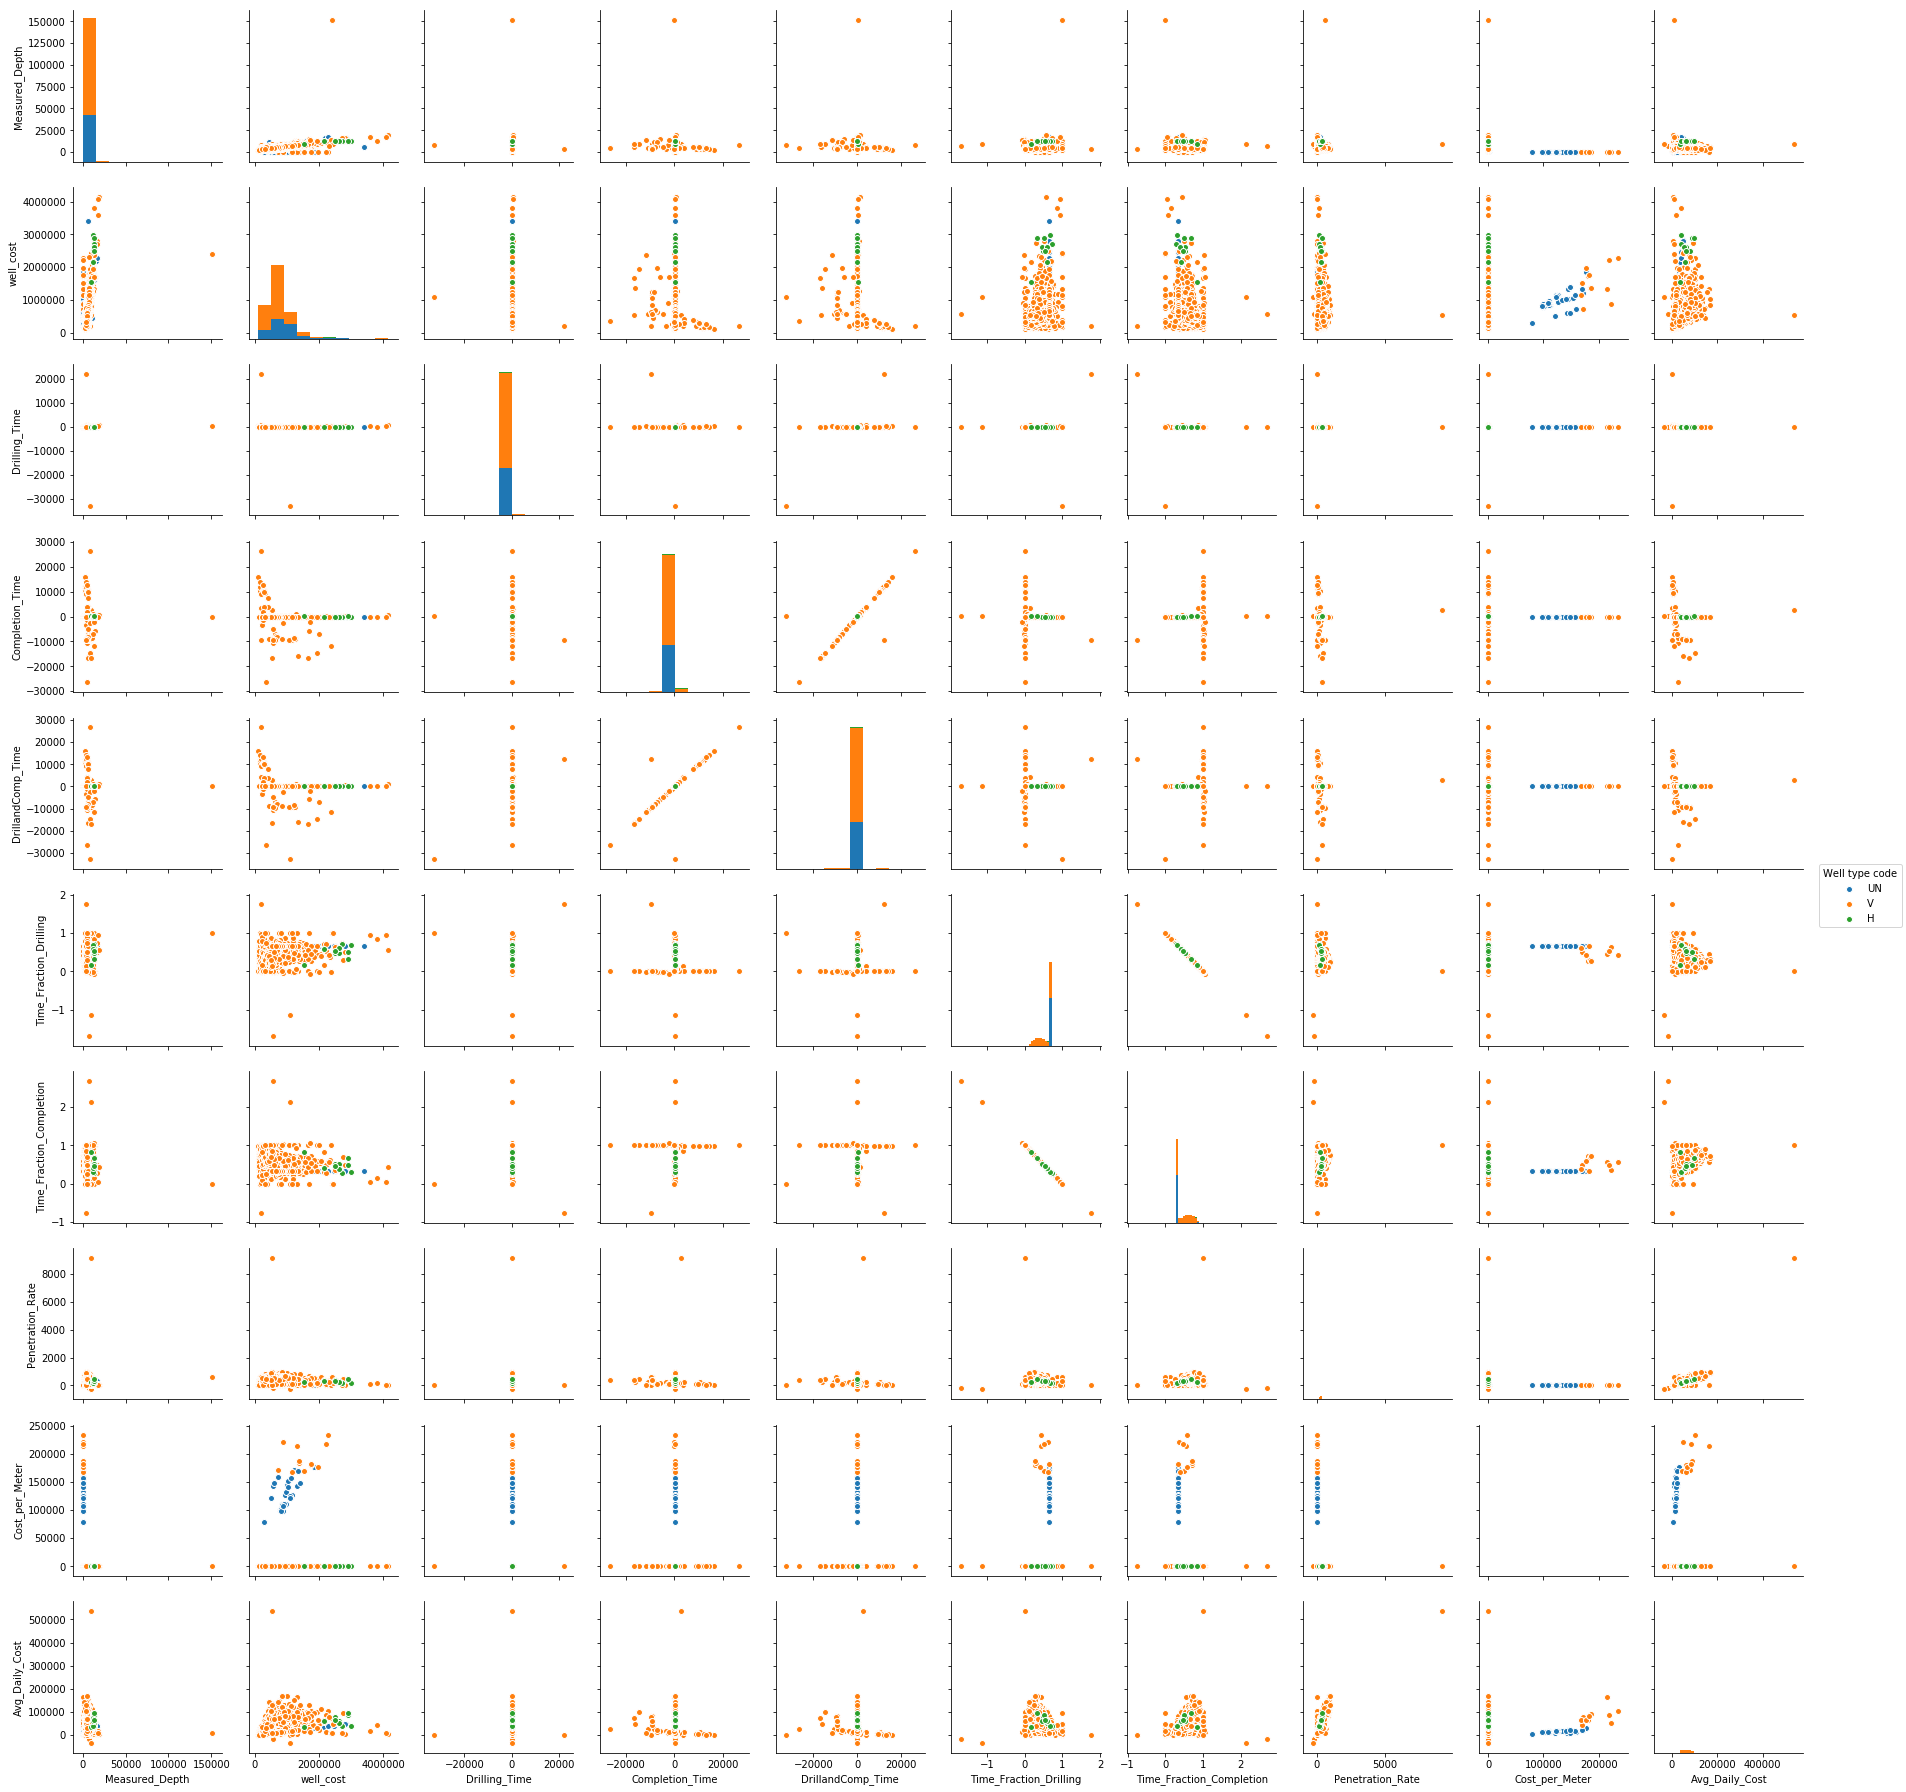

In [ ]:
sns.pairplot(features, kind ="scatter",hue = "Well type code")

In [ ]:
## Box 
BBox = (fb_well_data.longitude.min(),fb_well_data.longitude.max(),
         fb_well_data.latitude.min(),fb_well_data.latitude.max())
BBox

(-70.78875, -29.971057899999998, -69.5063, -22.04201)

In [ ]:
## Map it
ruh_m = plt.imread('C:/Out/Data/WoodMac/map.png')

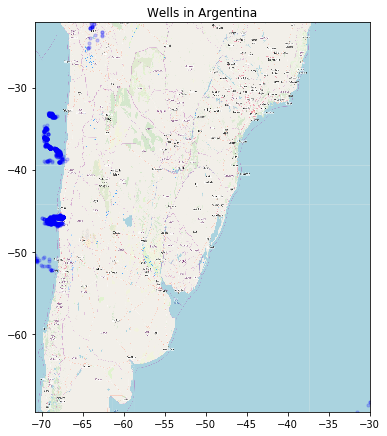

In [ ]:
## Map it
fig, ax = plt.subplots(figsize = (6,20))
ax.scatter(fb_well_data.longitude, fb_well_data.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Wells in Argentina')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
## Grouping
## Field_Name
fb_well_data['Avg_Depth_Field'] = fb_well_data.groupby('Field_Name')['Measured_Depth'].transform('mean')
fb_well_data['Min_Depth_Field'] = fb_well_data.groupby('Field_Name')['Measured_Depth'].transform('min')
fb_well_data['Max_Depth_Field'] = fb_well_data.groupby('Field_Name')['Measured_Depth'].transform('max')
fb_well_data['stdev_Depth_Field'] = fb_well_data.groupby('Field_Name')['Measured_Depth'].transform('std')
## well_cost
fb_well_data['Avg_Cost_Field'] = fb_well_data.groupby('Field_Name')['well_cost'].transform('mean')
fb_well_data['Min_Cost_Field'] = fb_well_data.groupby('Field_Name')['well_cost'].transform('min')
fb_well_data['Max_Cost_Field'] = fb_well_data.groupby('Field_Name')['well_cost'].transform('max')
fb_well_data['stdev_Cost_Field'] = fb_well_data.groupby('Field_Name')['well_cost'].transform('std')
fb_well_data.head(5)

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,...,Cost_per_Meter,Avg_Daily_Cost,Avg_Depth_Field,Min_Depth_Field,Max_Depth_Field,stdev_Depth_Field,Avg_Cost_Field,Min_Cost_Field,Max_Cost_Field,stdev_Cost_Field
0,8.799000e+13,UN,x-1001,Calmuco (CAL),Provincia Mendoza,-36.530880,-69.765530,4097.0,1970-01-01,1970-03-01,...,108.271876,7518.472490,3357.500000,2618.0,4097.0,1045.810929,3.514068e+05,2.592238e+05,4.435899e+05,130366.492449
1,8.799000e+13,UN,x-1003,Calmuco (CAL),Provincia Mendoza,-36.536380,-69.768330,2618.0,1970-01-01,1970-03-01,...,99.015972,4393.623986,3357.500000,2618.0,4097.0,1045.810929,3.514068e+05,2.592238e+05,4.435899e+05,130366.492449
2,8.799000e+13,UN,CHOx-1,Chanares Herrados (CHA),Chanares Herrados,-33.365903,-69.016933,15675.0,1970-01-01,1970-03-01,...,139.002608,36929.930051,11889.666667,10534.0,15675.0,1551.299697,1.845757e+06,1.538646e+06,2.178866e+06,226433.090972
3,8.799000e+13,UN,CDJx-2,Cerro Dona Juana (CDJ),Geopark Argentina,-35.820042,-69.781180,11118.0,1970-01-01,1970-03-01,...,114.222913,21524.243136,11118.000000,11118.0,11118.0,NaN,1.269930e+06,1.269930e+06,1.269930e+06,NaN
4,8.799000e+13,UN,CHEx-1,Chanares Herrados (CHA),Chanares Herrados,-33.359458,-68.947347,12007.0,1970-01-01,1970-03-01,...,137.531977,27988.922881,11889.666667,10534.0,15675.0,1551.299697,1.845757e+06,1.538646e+06,2.178866e+06,226433.090972


In [ ]:
## Label
## if no stdev then stdev == 0
fb_well_data['stdev_Depth_Field'] = fb_well_data['stdev_Depth_Field'].fillna(0)
fb_well_data['stdev_Cost_Field'] = fb_well_data['stdev_Cost_Field'].fillna(0)


In [ ]:
## set normality
fb_well_data.loc[(fb_well_data.Measured_Depth <= (fb_well_data.Avg_Depth_Field + (1 * fb_well_data.stdev_Depth_Field))),'Normal'] = 1
fb_well_data.loc[(fb_well_data.Measured_Depth >= (fb_well_data.Avg_Depth_Field - (1 * fb_well_data.stdev_Depth_Field))),'Normal'] = 1
fb_well_data['Normal'].fillna(0)
fb_well_data.head(5)


,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,...,Avg_Daily_Cost,Avg_Depth_Field,Min_Depth_Field,Max_Depth_Field,stdev_Depth_Field,Avg_Cost_Field,Min_Cost_Field,Max_Cost_Field,stdev_Cost_Field,Normal
0,8.799000e+13,UN,x-1001,Calmuco (CAL),Provincia Mendoza,-36.530880,-69.765530,4097.0,1970-01-01,1970-03-01,...,7518.472490,3357.500000,2618.0,4097.0,1045.810929,3.514068e+05,2.592238e+05,4.435899e+05,130366.492449,1.0
1,8.799000e+13,UN,x-1003,Calmuco (CAL),Provincia Mendoza,-36.536380,-69.768330,2618.0,1970-01-01,1970-03-01,...,4393.623986,3357.500000,2618.0,4097.0,1045.810929,3.514068e+05,2.592238e+05,4.435899e+05,130366.492449,1.0
2,8.799000e+13,UN,CHOx-1,Chanares Herrados (CHA),Chanares Herrados,-33.365903,-69.016933,15675.0,1970-01-01,1970-03-01,...,36929.930051,11889.666667,10534.0,15675.0,1551.299697,1.845757e+06,1.538646e+06,2.178866e+06,226433.090972,1.0
3,8.799000e+13,UN,CDJx-2,Cerro Dona Juana (CDJ),Geopark Argentina,-35.820042,-69.781180,11118.0,1970-01-01,1970-03-01,...,21524.243136,11118.000000,11118.0,11118.0,0.000000,1.269930e+06,1.269930e+06,1.269930e+06,0.000000,1.0
4,8.799000e+13,UN,CHEx-1,Chanares Herrados (CHA),Chanares Herrados,-33.359458,-68.947347,12007.0,1970-01-01,1970-03-01,...,27988.922881,11889.666667,10534.0,15675.0,1551.299697,1.845757e+06,1.538646e+06,2.178866e+06,226433.090972,1.0


In [ ]:
# Drop not-normal
fb_well_data[fb_well_data.Normal != 1]

,Well ID,Well type code,well_number,Field_Name,Operator,latitude,longitude,Measured_Depth,Drilling_Start,Drilling_end,...,Avg_Daily_Cost,Avg_Depth_Field,Min_Depth_Field,Max_Depth_Field,stdev_Depth_Field,Avg_Cost_Field,Min_Cost_Field,Max_Cost_Field,stdev_Cost_Field,Normal


In [ ]:
## what now ?
## we can calculate the standard deviation an indication of risk